In [106]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [144]:
#import data set
df=pd.read_csv("../data/flags.csv")

In [145]:
#EDA
df.head(5)

,%name,landmass,zone,area (thousand sq km),population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [146]:
type(df)

pandas.core.frame.DataFrame

In [147]:
df.columns

Index(['%name', 'landmass', 'zone', 'area (thousand sq km)', 'population',
       'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green',
       'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles',
       'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle',
       'icon', 'animate', 'text', 'topleft', 'botright'],
      dtype='object')

In [148]:
df.info()
#we have integer variable(numereic)and object variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   %name                  194 non-null    object
 1   landmass               194 non-null    int64 
 2   zone                   194 non-null    int64 
 3   area (thousand sq km)  194 non-null    int64 
 4   population             194 non-null    int64 
 5   language               194 non-null    int64 
 6   religion               194 non-null    int64 
 7   bars                   194 non-null    int64 
 8   stripes                194 non-null    int64 
 9   colours                194 non-null    int64 
 10  red                    194 non-null    int64 
 11  green                  194 non-null    int64 
 12  blue                   194 non-null    int64 
 13  gold                   194 non-null    int64 
 14  white                  194 non-null    int64 
 15  black                  

1   landmass               194 non-null    int64 
 2   zone                   194 non-null    int64 
 3   area (thousand sq km)  194 non-null    int64 
 4   population             194 non-null    int64 
 5   language               194 non-null    int64 
 6   religion               194 non-null    int64 
 7   bars                   194 non-null    int64   ποσοτικες μεταβλητες
 8   stripes                194 non-null    int64 
 9   colours                194 non-null    int64 
 10  red                    194 non-null    int64 
 11  green                  194 non-null    int64 
 12  blue                   194 non-null    int64 
 13  gold                   194 non-null    int64 
 14  white                  194 non-null    int64 
 15  black                  194 non-null    int64 
 16  orange                 194 non-null    int64 
 19  crosses                194 non-null    int64 
 20  saltires               194 non-null    int64 
 21  quarters               194 non-null    int64 
 22  sunstars               194 non-null    int64 
 23  crescent               194 non-null    int64 
 24  triangle               194 non-null    int64 
 25  icon                   194 non-null    int64 
 26  animate                194 non-null    int64 
 27  text                   194 non-null    int64 

 17  mainhue                194 non-null    object
  28  topleft                194 non-null    object    categorical variables 
 29  botright               194 non-null    object

In [149]:
df["topleft"].unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [150]:
df["zone"].unique()

array([1, 3, 2, 4], dtype=int64)

In [151]:
df["colours"].unique()

array([5, 3, 2, 8, 6, 4, 7, 1], dtype=int64)

In [152]:
df["religion"].unique()

array([2, 6, 1, 0, 5, 3, 4, 7], dtype=int64)

In [153]:
df["landmass"].unique()

array([5, 3, 4, 6, 1, 2], dtype=int64)

In [154]:
religion_dict={"CATHOLIC":0,"OTHER CHRISTIAN":1,"MUSLIM":2,"BUDDHIST":3,"HINDU":4,"ETHIC":5,"MARXIST":6,"OTHERS":7}

In [155]:
df.describe()

,landmass,zone,area (thousand sq km),population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


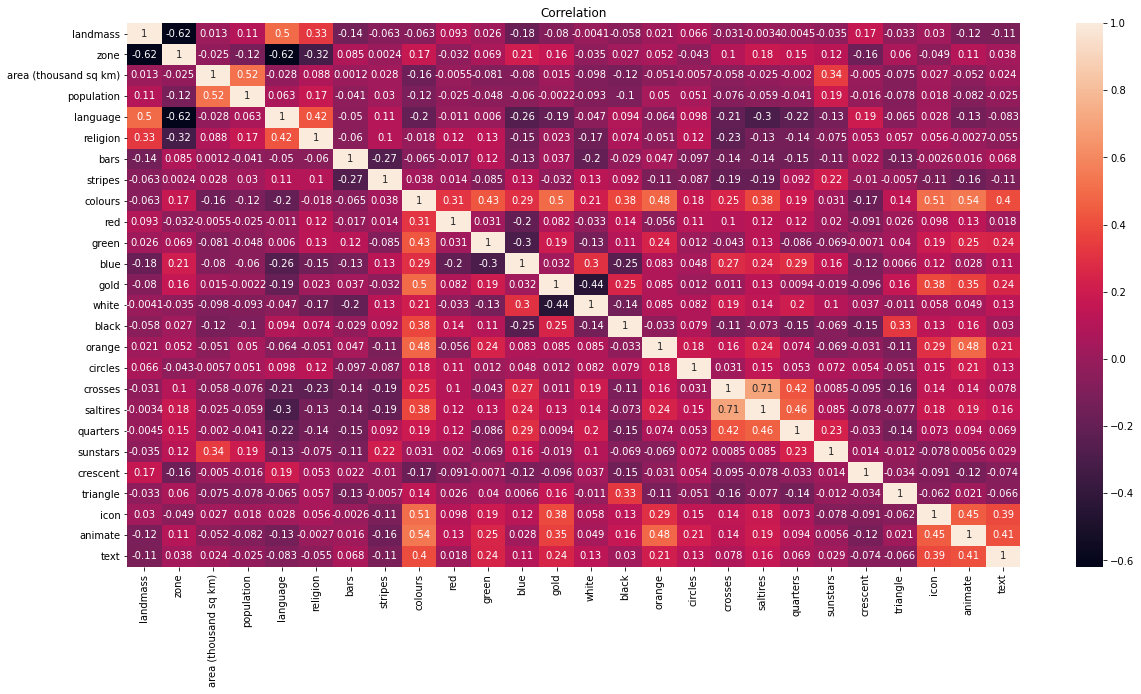

In [156]:
#plot correlation 
plt.figure(figsize=(20,10))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.title("Correlation")
plt.show()

In [157]:
#data prediction to predicct religion by flags
X=df[['red', 'green',
       'blue', 'gold', 'white', 'black', 'orange','circles',
       'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle']]
y=df["religion"]


In [158]:
X.head(8)

,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle
0,1,1,0,1,1,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,0,0,1,1,0
3,1,0,1,1,1,0,1,0,0,0,0,0,0,1
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,0,0,0,0,0,1,0,0
6,0,0,1,0,1,0,1,0,0,0,0,0,0,0
7,1,0,1,1,1,1,0,0,0,0,0,1,0,1


In [159]:
y.head(5)

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [160]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)


In [161]:
#scale the data
X = MinMaxScaler().fit_transform(X)


In [162]:
X_train.shape,y_train.shape

((135, 14), (135,))

In [163]:
X_test.shape,y_test.shape

((59, 14), (59,))

In [164]:
#implement the scikit-library
k = 5

neighbours = KNeighborsClassifier(n_neighbors = k)
neighbours.fit(X_train, y_train);

In [165]:
y_pred_5 = neighbours.predict(X_test)

In [166]:
y_pred_5

array([0, 6, 1, 1, 0, 0, 5, 0, 2, 6, 6, 1, 1, 2, 5, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 6, 1, 0, 1, 2, 1, 2, 0, 0, 2,
       2, 5, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [167]:
#model perfomance
neighbours.score(X_test, y_test)

0.4745762711864407

In [168]:
neighbours.score(X_train, y_train)

0.5259259259259259

In [169]:
round(accuracy_score(y_test, y_pred_5) * 100, 3)


47.458

In [170]:
y_test[:20], y_pred_5[:20]

(113    1
 184    6
 56     1
 89     1
 12     1
 37     6
 18     5
 125    2
 163    1
 7      1
 5      5
 123    1
 160    1
 175    2
 74     5
 33     1
 176    1
 180    1
 182    1
 71     1
 Name: religion, dtype: int64,
 array([0, 6, 1, 1, 0, 0, 5, 0, 2, 6, 6, 1, 1, 2, 5, 1, 1, 1, 1, 1],
       dtype=int64))

In [171]:
#change k
k = 4

neighbours = KNeighborsClassifier(n_neighbors = k)
neighbours.fit(X_train, y_train);


In [172]:
y_pred_4 = neighbours.predict(X_test)

In [173]:
neighbours.score(X_test, y_test)

0.4067796610169492

In [174]:
k = 3

neighbours = KNeighborsClassifier(n_neighbors = k)
neighbours.fit(X_train, y_train);

In [175]:
y_pred_3 = neighbours.predict(X_test)

In [176]:
neighbours.score(X_test, y_test)

0.3898305084745763

In [177]:
neighbours.score(X_train, y_train)

0.5259259259259259

In [178]:
k =2

neighbours = KNeighborsClassifier(n_neighbors = k)
neighbours.fit(X_train, y_train);

In [179]:
y_pred_2 = neighbours.predict(X_test)

In [180]:
neighbours.score(X_test, y_test)

0.3728813559322034

In [181]:
neighbours.score(X_train, y_train)

0.5777777777777777

In [182]:
#best k value
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

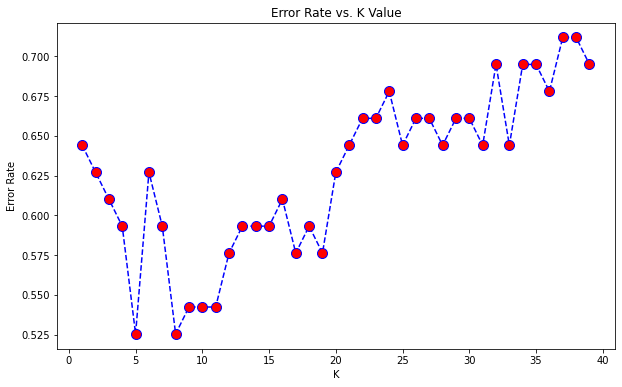

In [183]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Παρατηρώ ότι μετα το k=5 εχω το μικροτερο error

In [184]:
k =5

neighbours = KNeighborsClassifier(n_neighbors = k)
neighbours.fit(X_train, y_train);

In [185]:
y_best_5_pred = neighbours.predict(X_test)

In [186]:
neighbours.score(X_test, y_test)

0.4745762711864407

In [187]:
neighbours.score(X_train, y_train)

0.5259259259259259

In [188]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_best_5_pred))

              precision    recall  f1-score   support

           0       0.15      0.50      0.23         6
           1       0.79      0.75      0.77        20
           2       0.46      0.67      0.55         9
           3       0.00      0.00      0.00         2
           5       1.00      0.20      0.33        15
           6       0.25      0.20      0.22         5
           7       0.00      0.00      0.00         2

    accuracy                           0.47        59
   macro avg       0.38      0.33      0.30        59
weighted avg       0.63      0.47      0.47        59



c:\users\nikos\uoa_python_course\uoa_venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikos\uoa_python_course\uoa_venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nikos\uoa_python_course\uoa_venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Άρα το καλύτερο μοντέλο μου είναι αυτό με κ=5 διότι έχω  accuracy=0.47

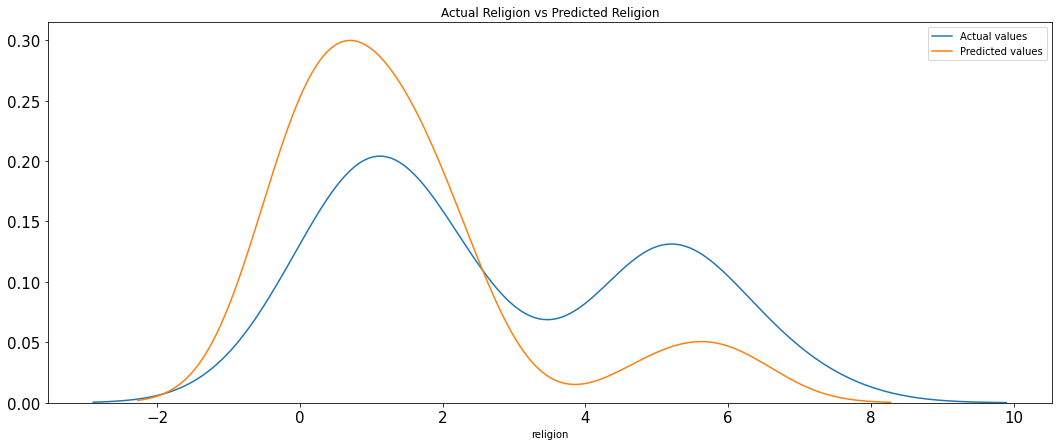

In [189]:
#plot actual vs predicted value 
plt.figure(figsize=(18,7))
sns.kdeplot(data=X_test,x=y_test,label="Actual values")
sns.kdeplot(data=X_test,x=y_best_5_pred,label="Predicted values")
plt.title("Actual Religion vs Predicted Religion")
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
plt.legend()
plt.show()

In [190]:
#KNN VS naive_bayes


In [191]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()


In [192]:
fit_gnb_classifier = gnb_classifier.fit(X_train, y_train)

In [193]:
y_pred_bayes = fit_gnb_classifier.predict(X_test)

In [194]:
fit_gnb_classifier.score(X_test, y_test)

0.1864406779661017

In [195]:
fit_gnb_classifier.score(X_train, y_train)

0.26666666666666666

In [196]:
#KNN VS logistic regression


In [197]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression(max_iter=5000)  # max_iter is crucial here for convergence


In [198]:
fit_logit_clf = logit_clf.fit(X_train, y_train)

In [199]:
y_pred_logistic = fit_logit_clf.predict(X_test)


In [200]:
fit_logit_clf.score(X_test, y_test)

0.4067796610169492

In [201]:
fit_logit_clf.score(X_train, y_train)

0.5111111111111111

Αρα το καλυτερο μοντελο ειναι αυτο με KNN διοτι εχω score στο test data=47%